# 日收盘价数据预处理

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime
import numpy as np

In [25]:
stocks_daily_price = pd.read_excel('五只股票前复权收盘价数据.xlsx')

stocks_daily_price.head()
# stocks_daily_price.columns

,日期,泸州老窖000568.SZ,美的集团000333.SZ,宁德时代300750.SZ,中国平安601318.SH,隆基绿能601012.SH
0,2019-04-22,66.2807,51.2235,82.8779,79.8830,17.1351
1,2019-04-23,67.0859,49.0938,80.9156,78.0099,17.0999
2,2019-04-24,69.4538,48.6102,77.8674,79.0199,16.5866
3,2019-04-25,68.7731,48.9171,79.4712,78.0741,16.6218
4,2019-04-26,67.5652,47.8104,78.7938,76.5775,16.5585


In [26]:
stocks_daily_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   日期             747 non-null    datetime64[ns]
 1   泸州老窖000568.SZ  747 non-null    float64       
 2   美的集团000333.SZ  747 non-null    float64       
 3   宁德时代300750.SZ  747 non-null    float64       
 4   中国平安601318.SH  747 non-null    float64       
 5   隆基绿能601012.SH  747 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 35.1 KB


可知，并不需要进行缺失值处理。

In [27]:
stocks_daily_price.index=pd.DatetimeIndex(stocks_daily_price.日期) # 日期索引变换

stocks_daily_price.drop(labels=['日期'],axis=1,inplace=True)

stocks_daily_price.head()

,泸州老窖000568.SZ,美的集团000333.SZ,宁德时代300750.SZ,中国平安601318.SH,隆基绿能601012.SH
日期,,,,,
2019-04-22,66.2807,51.2235,82.8779,79.8830,17.1351
2019-04-23,67.0859,49.0938,80.9156,78.0099,17.0999
2019-04-24,69.4538,48.6102,77.8674,79.0199,16.5866
2019-04-25,68.7731,48.9171,79.4712,78.0741,16.6218
2019-04-26,67.5652,47.8104,78.7938,76.5775,16.5585


通过上一步的处理，我们将日期挪到了索引里，这方便我们后面的研究。（如画图）

# 股票数据可视化

Text(0, 0.5, '股票价格')

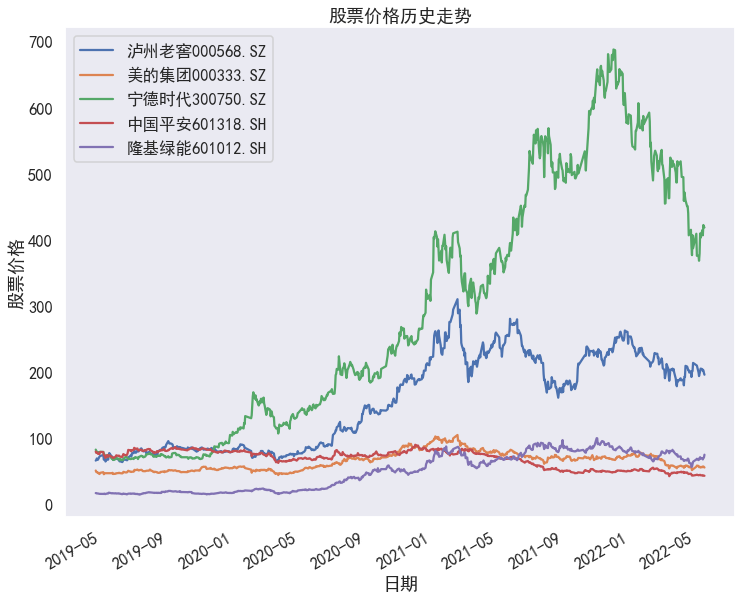

In [21]:
seaborn.set_style("darkgrid")
seaborn.set(font="SimHei")
seaborn.set_context("talk")
plt=stocks_daily_price.plot(figsize=(12,10),title="股票价格历史走势",grid=False)
plt.set_xlabel('日期')
plt.set_ylabel('股票价格')

可以看到五家公司股票的走势的总体趋势类似，表明它们的股价都受到了同样的宏观因素的冲击，比如政府推行的减税政策对于全行业来说都是一个利好消息。但是股票肯定也会有一些公司层面的独特风险，比如公司的经营策略等，构建投资组合的目的就是为了降低公司层面的独特性风险。

# 日收益率计算、波动和分布

In [28]:
stocks_daily_return = np.log(stocks_daily_price)-np.log(stocks_daily_price.shift(1)) 
stocks_daily_return.dropna(inplace=True)
stocks_daily_return.head()

,泸州老窖000568.SZ,美的集团000333.SZ,宁德时代300750.SZ,中国平安601318.SH,隆基绿能601012.SH
日期,,,,,
2019-04-23,0.012075,-0.042466,-0.023962,-0.023727,-0.002056
2019-04-24,0.034688,-0.009899,-0.038399,0.012864,-0.030477
2019-04-25,-0.009849,0.006294,0.020387,-0.012041,0.002120
2019-04-26,-0.017720,-0.022884,-0.008560,-0.019355,-0.003816
2019-04-29,0.067876,-0.040488,0.003155,-0.003484,-0.037203


Text(0, 0.5, '日收益率波动范围')

C:\Users\24450\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


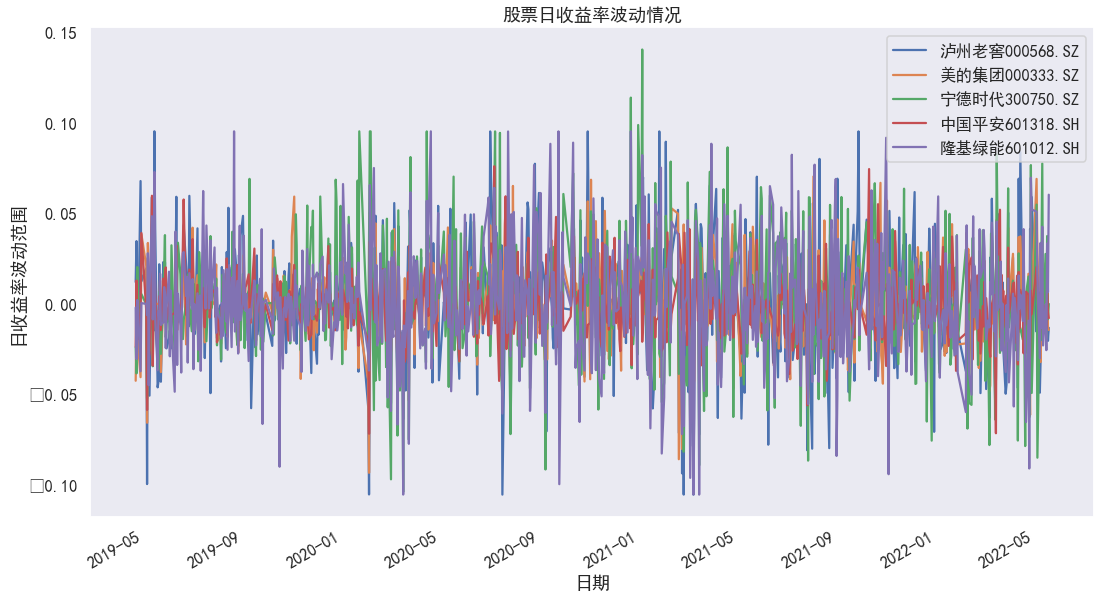

In [29]:
plt_volatility=stocks_daily_return.plot(figsize=(18,10),title="股票日收益率波动情况",grid=False)
plt_volatility.set_xlabel('日期')
plt_volatility.set_ylabel('日收益率波动范围')

可以看到，宁德时代、泸州老窖和隆基绿能的波动相对比较大。

Text(0, 0.5, '日收益率密度')

C:\Users\24450\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


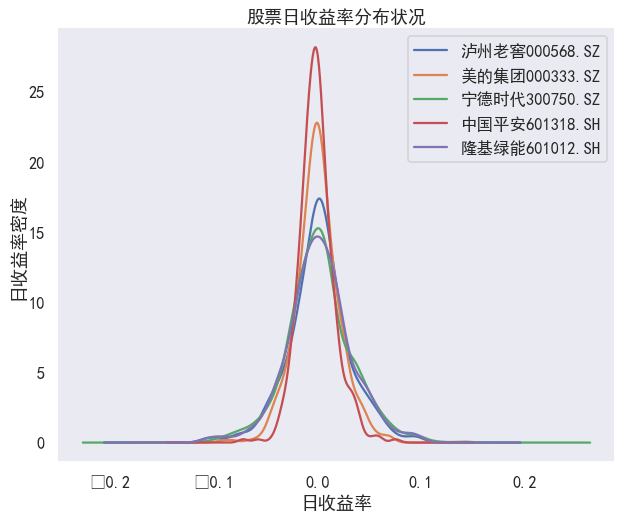

In [31]:
plt_dis=stocks_daily_return.plot(kind="density",figsize=(10,8),title="股票日收益率分布状况",grid=False)
plt_dis.set_xlabel('日收益率')
plt_dis.set_ylabel('日收益率密度')

可以看到，五只股票的日收益率波动都近似服从期望为0的正态分布，符合完全有效金融市场理论。

# 相关性分析

In [36]:
stocks_corr = stocks_daily_return.corr()
stocks_corr

,泸州老窖000568.SZ,美的集团000333.SZ,宁德时代300750.SZ,中国平安601318.SH,隆基绿能601012.SH
泸州老窖000568.SZ,1.000000,0.464885,0.306681,0.360178,0.313123
美的集团000333.SZ,0.464885,1.000000,0.296203,0.486660,0.276953
宁德时代300750.SZ,0.306681,0.296203,1.000000,0.175058,0.521810
中国平安601318.SH,0.360178,0.486660,0.175058,1.000000,0.183015
隆基绿能601012.SH,0.313123,0.276953,0.521810,0.183015,1.000000


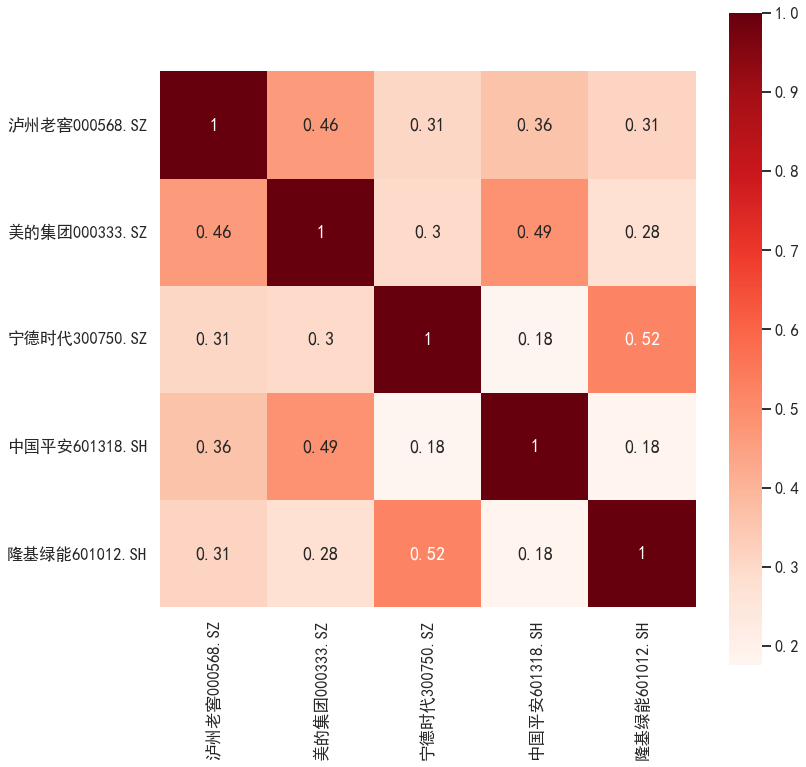

In [37]:
plt.subplots(figsize = (12,12))
seaborn.heatmap(stocks_corr,annot = True,vmax = 1,square = True,cmap = "Reds")
plt.show()

C:\Users\24450\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\Users\24450\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


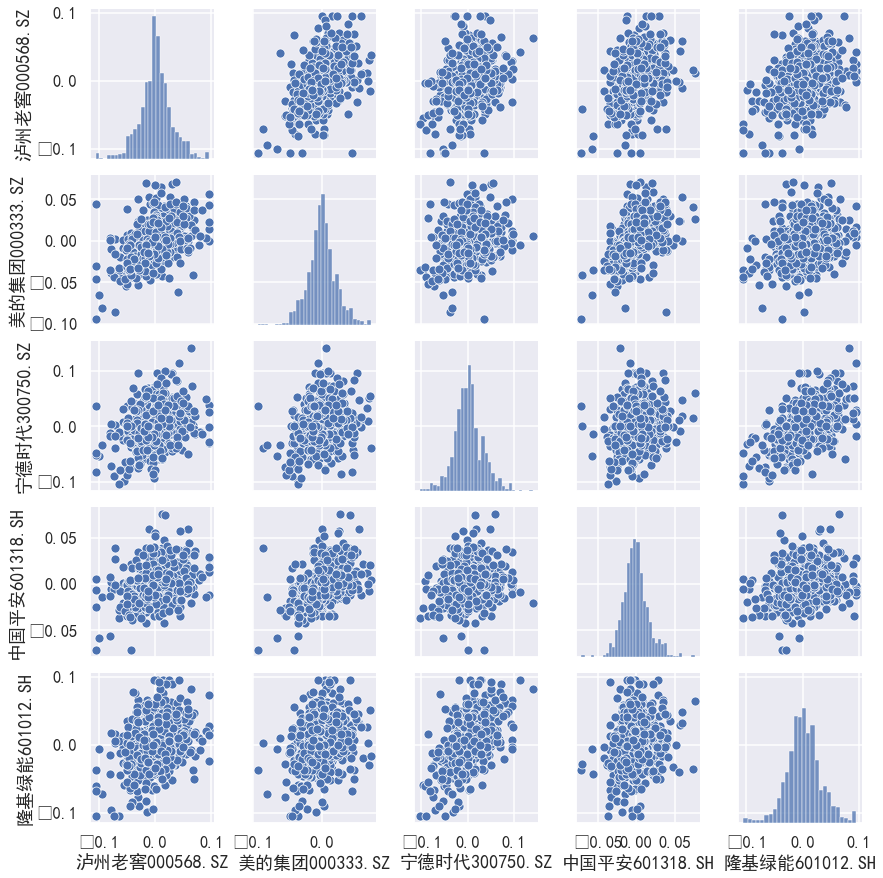

In [33]:
seaborn.pairplot(stocks_daily_return) 

相关性在投资组合领域也非常重要，是分散化投资风险的核心思想。相关性越弱越有利于投资组合的分散化。
通过相关系数计算、热力图和分布图，可以看出五只股票的相关性都不是太强.
并且五只股票并没有负相关——相关系数都为正，一个原因可能是我们只选取了五只股票，而想要有效地分散投资风险，一般需要几十只股票。

# 有效前沿构造（解析法）

In [40]:
from scipy import linalg
# 定义类
class Markowitz:
    def __init__(self, returns):
        self.returns = returns
    # 求解最小方差组合
    def solveMinVar(self, goal_ret):
        cov = np.array(self.returns.cov())
        mean = np.array(self.returns.mean())
        row1 = np.append(np.append(cov.swapaxes(0,1),[mean],axis=0),
                        [np.ones(len(mean))], axis=0).swapaxes(0,1)
        row2 = list(np.ones(len(mean)))
        row2.extend([0,0])
        row3 = list(mean)
        row3.extend([0,0])
        A = np.append(row1, np.array([row2,row3]), axis=0)
        b = np.append(np.zeros(len(mean)), [1,goal_ret], axis=0)
        results = linalg.solve(A, b)
        return(np.array([list(self.returns.columns), results[:-2]]))
    # 计算投资组合方差
    def calVar(self, portion):
        return(np.dot(np.dot(portion, self.returns.cov()), portion))
    # 绘制有效前沿
    def plotFrontier(self):
        goal_ret = [x/100000 for x in range(-500, 1000)]
        variance = list(map(lambda x: self.calVar(self.solveMinVar(x)[1,:].astype(float)), goal_ret))
        plt.plot(variance, goal_ret)
        plt.xlabel('Variance')
        plt.ylabel('Expected Return')
        plt.title('Efficient Frontier')

C:\Users\24450\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


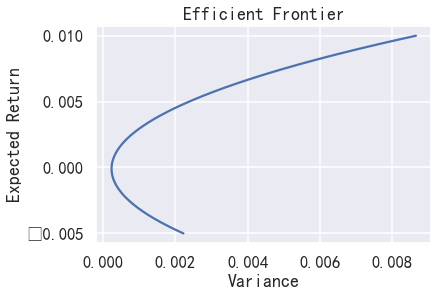

In [43]:
m = Markowitz(stocks_daily_return)

m.plotFrontier()